**Create two custom layers in TensorFlow that add two inputs and multiply two inputs
respectively.Add layer names and other things that are present in other common
layers in TensorFlow.**

1. **Custom Layer Definition**:
   Two custom layers (`AddLayer` and `MultiplyLayer`) are defined as subclasses of `tf.keras.layers.Layer`. These layers implement the `call` method, which specifies the layer's computation when called during model execution.

2. **Addition Layer**:
    `AddLayer` takes two input tensors and performs element-wise addition.

3. **Multiplication Layer**:
    `MultiplyLayer` takes two input tensors and performs element-wise multiplication.

4. **Layer Instances**:
    Instances of the custom layers (`add_layer` and `multiply_layer`) are created for later use.


In [1]:
import tensorflow as tf

# Define a custom layer that performs element-wise addition
class AddLayer(tf.keras.layers.Layer):
    def call(self, inputs):
        return tf.math.add(inputs[0], inputs[1])
    
# Define a custom layer that performs element-wise addition
class MultiplyLayer(tf.keras.layers.Layer):
    def call(self, inputs):
        return tf.math.multiply(inputs[0], inputs[1])

# Example Usage
# Create instances of the custom layers
add_layer = AddLayer(name="custom_add_layer")
multiply_layer = MultiplyLayer(name="custom_multiply_layer")


**Combine these two layers in a third custom layer. Concatenate them or multiply
them etc.**

1. **Combined Layer Definition:**
   - `CombinedLayer` is a custom layer that combines the output of two custom layers.

2. **Combination in `call` Method:**
   - In the `call` method, the inputs are processed separately by the addition and multiplication layers. The outputs are then combined using a chosen method, such as concatenation along the last axis.




In [3]:
class CombinedLayer(tf.keras.layers.Layer):
    def __init__(self, name=None):
        super(CombinedLayer, self).__init__(name=name)
        self.add_layer = AddLayer()
        self.multiply_layer = MultiplyLayer()

    def call(self, inputs):
        # Perform addition and multiplication using the custom layers
        added = self.add_layer(inputs)
        multiplied = self.multiply_layer(inputs)
        # Choose how to combine (e.g., concatenate)
        combined_output = tf.concat([added, multiplied], axis=-1)
        return combined_output

# Example Usage with name argument
# Create an instance of the combined layer
combined_layer = CombinedLayer(name="custom_combined_layer")



**Create a model using these and observe how batch inference works**

1. **Input Layers:**
   - Two input layers (`tf.keras.layers.Input`) are defined.

2. **Model Definition:**
   - A TensorFlow model is defined (`model`) with the input layers and the combined output

3. **Batch Inference:**
   - The model is used to make predictions (`predictions = model.predict(input_data)`) on the batch of input data.




In [4]:
# Define two input layers
inputs = [tf.keras.layers.Input(shape=(32,)), tf.keras.layers.Input(shape=(32,))]
# Create an instance of the CombinedLayer
combined_output = combined_layer(inputs)

# Build a model with the CombinedLayer
model = tf.keras.models.Model(inputs=inputs, outputs=combined_output)

# Generate random data for batch inference
import numpy as np
batch_size = 5
input_data = [np.random.rand(batch_size, 32), np.random.rand(batch_size, 32)]

# Make predictions
predictions = model.predict(input_data)
print(predictions)


1/1 [==============================] - 2s 2s/step
[[1.2808465  1.1958187  0.5038748  0.7961899  1.4557127  1.1049786
  0.74600554 1.17818    1.220435   0.38220486 0.3673247  0.22865993
  0.7398205  1.493943   1.2104337  0.8881916  1.4970508  0.762259
  0.6555213  0.41933447 1.2750549  0.27285028 0.7809219  1.4703648
  0.94488627 1.1912961  0.3916601  0.7682205  0.78415716 0.6499459
  1.3397107  1.2073834  0.3487532  0.35141256 0.06340505 0.158349
  0.4979838  0.30367756 0.07971493 0.32241485 0.3470811  0.0345061
  0.01409855 0.00989399 0.1109949  0.5437152  0.23996052 0.16348116
  0.53057396 0.11793213 0.10289855 0.04114618 0.36555204 0.01185524
  0.04750951 0.5307637  0.20664597 0.22068954 0.028815   0.14684638
  0.13072552 0.10173478 0.44839016 0.35432324]
 [1.1908488  1.129861   1.0152359  0.4667157  0.600024   0.9442382
  1.2322474  1.1870942  0.45147562 1.2150578  0.7745786  0.6711526
  1.4902107  0.3409686  0.19396134 0.3917206  1.0625856  1.7786443
  1.5943555  1.3644753  1.2055

**Use a predefined layer in Tensorflow to split an input/image into 4x4 = 16 tiles**

1. **Reshape Layer Definition:**
   - `split_layer` is a custom layer defined using `tf.keras.layers.Reshape`. It reshapes the input tensor into a 4x4 grid by specifying the target shape as `(4, 4, -1)`. The `-1` in the shape indicates that TensorFlow should automatically infer the size of the last dimension based on the total number of elements.

2. **Input Layer:**
   - An input layer (`input_image`) is defined with a shape of (16,), representing an input image with 16 elements.



In [6]:
split_layer = tf.keras.layers.Reshape((4, 4, -1))

# Create an input layer for an image with a shape of (16,)
input_image = tf.keras.layers.Input(shape=(16,))
split_output = split_layer(input_image)


KerasTensor(type_spec=TensorSpec(shape=(None, 4, 4, 1), dtype=tf.float32, name=None), name='reshape_1/Reshape:0', description="created by layer 'reshape_1'")


**Write a graph data structure in python with random connections between nodes.**

1. **Graph Creation:**
   - The code uses the NetworkX library to create a graph (`graph`) representing nodes and edges.

2. **Node Addition:**
   - Nodes are added to the graph using a loop to iterate over a specified number of nodes (`num_nodes`).

3. **Random Edge Connections:**
   - For each node in the graph, a random subset of other nodes is chosen as neighbors. The number of neighbors is determined by `random.randint(1, 3)`, creating a random and sparse connection structure.

4. **Edge Addition:**
   - Edges are added between each node and its selected neighbors, creating a random network structure.


C:\Users\DELL\AppData\Local\Temp\ipykernel_2880\1069569232.py:13: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  neighbors = random.sample(graph.nodes - {node}, k=random.randint(1, 3))


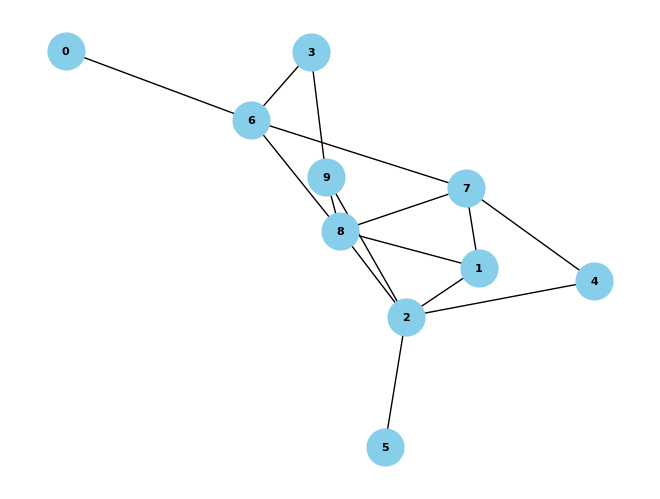

In [8]:
import networkx as nx
import random
import matplotlib.pyplot as plt

# Create a random graph
graph = nx.Graph()
nodes = 10

# Add nodes to the graph
for i in range(nodes):
    graph.add_node(i)

# Connect Nodes Randomly
for node in graph.nodes:
    neighbors = random.sample(graph.nodes - {node}, k=random.randint(1, 3))
    for neighbor in neighbors:
        graph.add_edge(node, neighbor)

# Draw the graph
pos = nx.spring_layout(graph)  # you can choose a different layout if needed
nx.draw(graph, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=8)
plt.show()


**Two-part question:**

a. Do inference in one of the nodes and write any rules (>,<,==) to decide the
next node based on the output (5 pts).

b. You can choose to use the custom model you have created in questions 1 or
2 inside the node. The input can be a random input created using
random.randint(1,100). You can use any error correction techniques
we used before.**

1. **Model Inference:**
   - The code uses a TensorFlow model (`model`) to perform inference on a randomly generated input (`random_input`). The model takes two identical inputs in this example.

2. **Graph Node Selection:**
   - A random node (`current_node`) is selected from the nodes in a graph.

3. **Decision Rule:**
   - An example decision rule based on the model's output is provided. If the output is positive, move to a random neighbor in the graph. If negative, move to a random node excluding the current one. If the output is zero, stay in the current node.

4. **Graph Navigation:**
   - The resulting `next_node` can be used for the next iteration or decision in the graph, depending on the specific application.



In [11]:
import numpy as np
import random

# Assuming you have a model defined
model = tf.keras.models.Model(inputs=inputs, outputs=combined_output)

# Example Input
random_input = np.random.randint(1, 100, size=(1, 32))
output = model.predict([random_input, random_input])

# Assume some initial node
current_node = random.choice(list(graph.nodes))

# Example Rule
if np.any(output > 0):
    # If the model output is positive, move to a random neighbor
    next_node = random.choice(list(graph.neighbors(current_node)))
elif np.any(output < 0):
    # If the model output is negative, move to a random node excluding the current one
    next_node = random.choice(list(graph.nodes - {current_node}))
else:
    # If the model output is zero, stay in the current node
    next_node = current_node

# Now you can use 'next_node' for the next iteration or decision in your graph.



1/1 [==============================] - 0s 110ms/step
